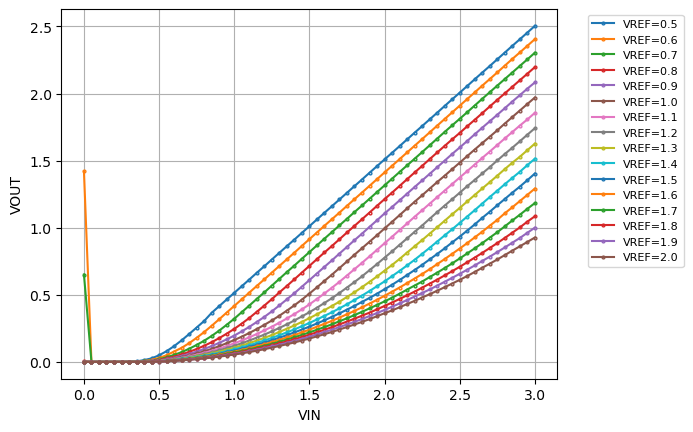

Index(['VDD', 'IDD', 'ISS', 'VREF', 'IREF', 'VIN', 'VOUT'], dtype='object')
Fit: VOUT = 0.993657 * VIN + -0.478202
R^2 = 0.999945


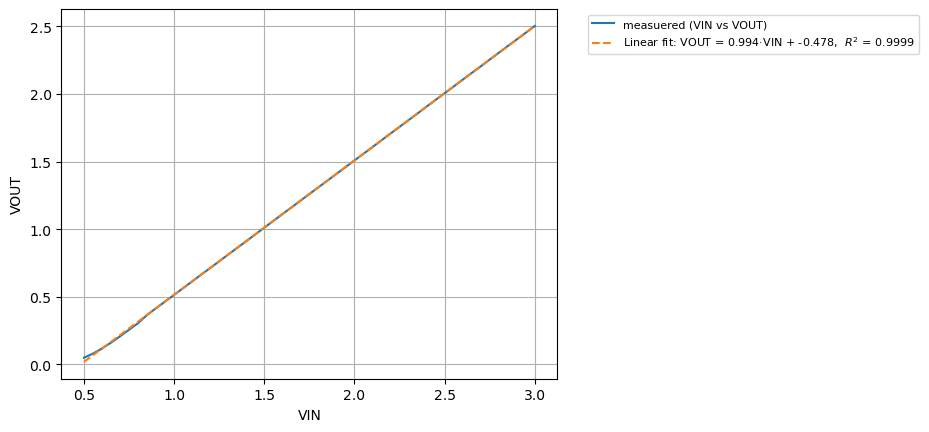

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


readfile = pd.read_csv('plagmatic_sf_sweep.csv',sep = ',', skiprows=0)     # CSV 파일 이름만 변경(위에 불필요한 내용 skiprows로 삭제)

data = readfile.iloc[:,:]                                      # 읽어온 파일의 row는 다 들고오고 column은 두번째 열부터 들고옴(dataname 열 삭제)

data.columns = data.columns.str.strip()                         # column 내의 앞뒤 글자 공백 삭제

plt.figure()

for VREF, group in data.groupby('VREF'):
    plt.plot(group['VIN'],group['VOUT'],marker='o',markerfacecolor='none',markersize=2,label=f'VREF={VREF}')

plt.xlabel('VIN')
plt.ylabel('VOUT')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 8)              # legend를 plot 밖으로 내보냄
plt.grid(True)
plt.show()



data2 = data[data['VREF'] == 0.5]
data2 = data2[data2['VIN'] >= 0.5]

# 1) 필요한 컬럼만 추출 + 결측/비정상값 제거
data3 = data2[['VIN', 'VOUT']].copy()
# data = data.replace([np.inf, -np.inf], np.nan).dropna()

x = data3['VIN'].to_numpy(dtype=float)
y = data3['VOUT'].to_numpy(dtype=float)



# 2) 선형 피팅: y = a*x + b
a, b = np.polyfit(x, y, 1)

# 3) 예측값과 R^2 계산
y_hat = a * x + b
ss_res = np.sum((y - y_hat) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan

print(f"Fit: VOUT = {a:.6g} * VIN + {b:.6g}")
print(f"R^2 = {r2:.6f}")

idx = np.argsort(x)
x_sorted = x[idx]
y_sorted = y[idx]

# 피팅 결과
y_fit = a * x_sorted + b

plt.figure()
plt.plot(x_sorted, y_sorted, linestyle='-', label='measuered (VIN vs VOUT)')
plt.plot(
    x_sorted,
    y_fit,
    linestyle='--',
    label=f'Linear fit: VOUT = {a:.3g}·VIN + {b:.3g},  $R^2$ = {r2:.4f}'
)

plt.xlabel('VIN')
plt.ylabel('VOUT')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 8)   
plt.grid(True)

plt.show()



<bound method IndexOpsMixin.value_counts of 0      3.3
1      3.3
2      3.3
3      3.3
4      3.3
      ... 
971    3.3
972    3.3
973    3.3
974    3.3
975    3.3
Name: VDD, Length: 976, dtype: float64>
